In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score,accuracy_score,auc

### Q1 Read the input file and check the data dimension

In [3]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [4]:
data=pd.read_csv('german_credit.csv')
data.head().T

,0,1,2,3,4
default,0,1,0,0,1
account_check_status,< 0 DM,0 <= ... < 200 DM,no checking account,< 0 DM,< 0 DM
duration_in_month,6,48,12,42,24
credit_history,critical account/ other credits existing (not ...,existing credits paid back duly till now,critical account/ other credits existing (not ...,existing credits paid back duly till now,delay in paying off in the past
purpose,domestic appliances,domestic appliances,(vacation - does not exist?),radio/television,car (new)
credit_amount,1169,5951,2096,7882,4870
savings,unknown/ no savings account,... < 100 DM,... < 100 DM,... < 100 DM,... < 100 DM
present_emp_since,.. >= 7 years,1 <= ... < 4 years,4 <= ... < 7 years,4 <= ... < 7 years,1 <= ... < 4 years
installment_as_income_perc,4,2,2,2,3
personal_status_sex,male : single,female : divorced/separated/married,male : single,male : single,male : single


In [5]:
data.shape

(1000, 21)

In [6]:
data.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [9]:
data.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

#### Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [10]:
df = pd.get_dummies(data)
print(data.columns)
print(df.columns)

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')
Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_del

In [11]:
df.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

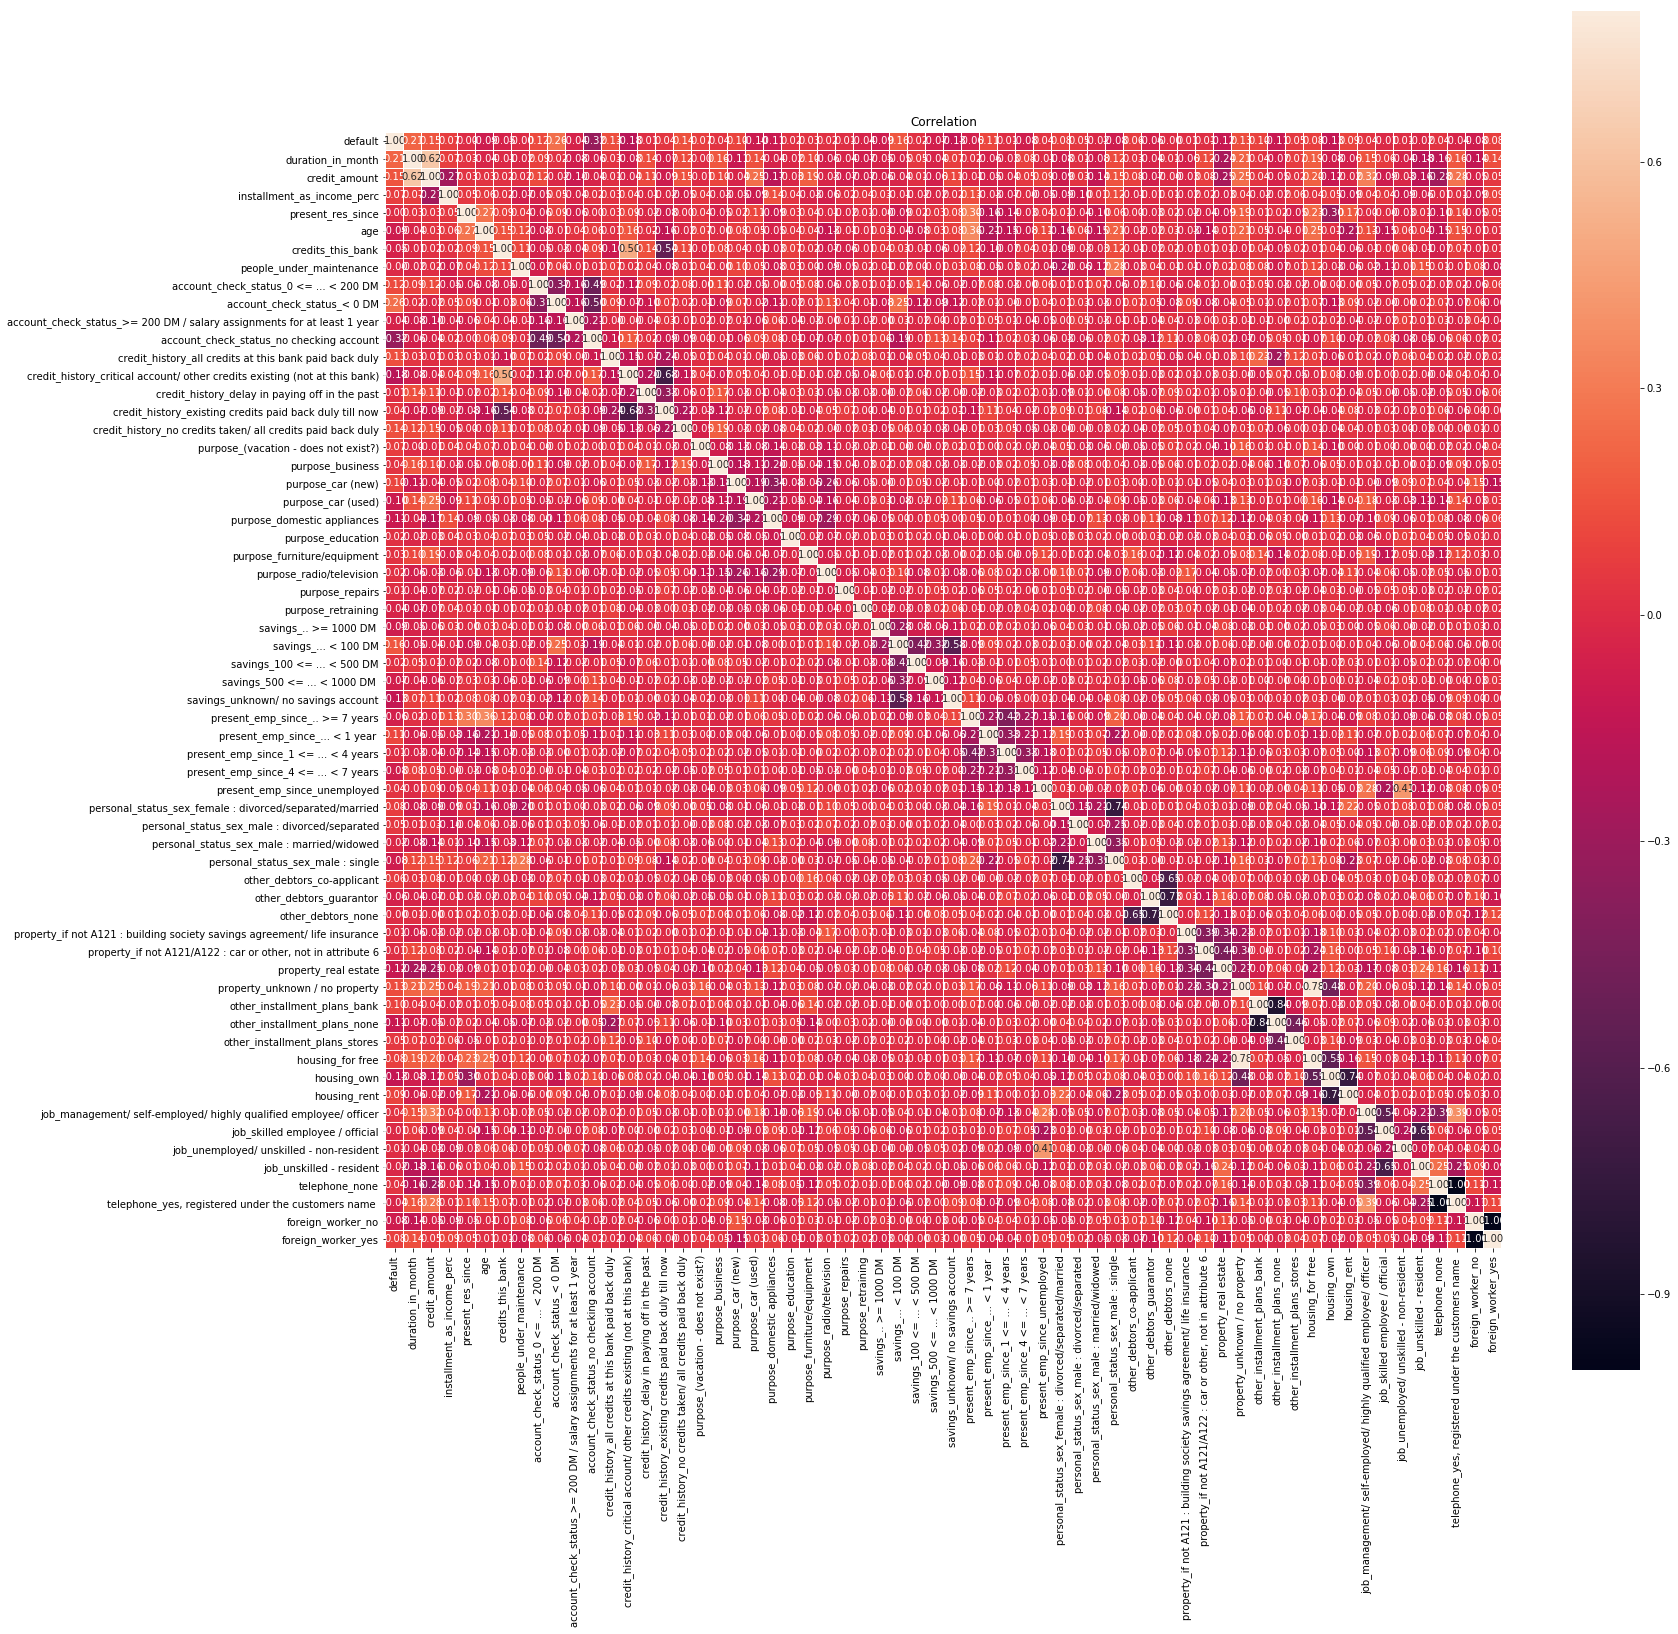

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### Drop the original variables which are converted to dummy

In [13]:
print(data.columns)
print(df.columns)

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')
Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_del

# It is observed that the original variables are not present after converting to dummies using get_dummies

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(["default"], axis=1)
y = df[["default"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)
print(X.head(4).T)
print(y.head().T)

                                                       0     1     2     3
duration_in_month                                      6    48    12    42
credit_amount                                       1169  5951  2096  7882
installment_as_income_perc                             4     2     2     2
present_res_since                                      4     2     3     4
age                                                   67    22    49    45
credits_this_bank                                      2     1     1     1
people_under_maintenance                               1     1     2     2
account_check_status_0 <= ... < 200 DM                 0     1     0     0
account_check_status_< 0 DM                            1     0     0     1
account_check_status_>= 200 DM / salary assignm...     0     0     0     0
account_check_status_no checking account               0     0     1     0
credit_history_all credits at this bank paid ba...     0     0     0     0
credit_history_critical a

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [15]:
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
# max_depth=5, max_features=0.25, max_leaf_nodes=20)

In [16]:
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [17]:
rfcl.score(X_train, y_train)

1.0

In [18]:
rfcl.score(X_test, y_test)

0.812

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [19]:
predicted = rfcl.predict(X_test)
print('Accuracy- ',accuracy_score(y_test, predicted))
print(confusion_matrix(y_test,predicted))
print('class\n',classification_report(y_test,predicted))


Accuracy-  0.812
[[175  10]
 [ 37  28]]
class
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       185
           1       0.74      0.43      0.54        65

   micro avg       0.81      0.81      0.81       250
   macro avg       0.78      0.69      0.71       250
weighted avg       0.80      0.81      0.79       250



### Q6 Show the list of the features importance( 1 Marks)

Feature ranking:
1. feature 1 (0.096641)
2. feature 0 (0.079879)
3. feature 4 (0.079155)
4. feature 10 (0.048697)
5. feature 2 (0.035070)
6. feature 3 (0.034681)
7. feature 8 (0.032632)
8. feature 18 (0.019292)
9. feature 27 (0.019263)
10. feature 48 (0.017694)
11. feature 12 (0.017631)
12. feature 5 (0.017378)
13. feature 39 (0.016620)
14. feature 20 (0.016242)
15. feature 7 (0.016225)
16. feature 36 (0.016043)
17. feature 47 (0.015413)
18. feature 33 (0.015402)
19. feature 44 (0.015232)
20. feature 32 (0.015120)
21. feature 54 (0.015081)
22. feature 45 (0.014933)
23. feature 57 (0.014405)
24. feature 14 (0.014233)
25. feature 43 (0.014167)
26. feature 46 (0.014056)
27. feature 58 (0.013778)
28. feature 34 (0.013742)
29. feature 51 (0.013739)
30. feature 23 (0.013314)
31. feature 30 (0.012879)
32. feature 31 (0.012872)
33. feature 6 (0.011753)
34. feature 53 (0.011564)
35. feature 56 (0.011379)
36. feature 52 (0.010978)
37. feature 19 (0.010082)
38. feature 42 (0.009894)
39. feature 1

(-1, 61)

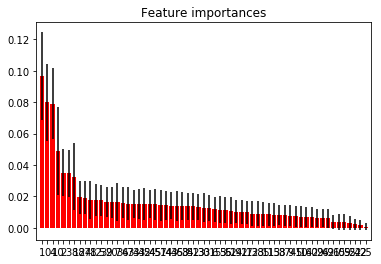

In [20]:
importances = rfcl.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfcl.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [22]:
# Use below values
num_folds = 10
seed = 77

In [23]:
#Validate the Random Forest model build above using k fold
kf = KFold(n_splits=10)

In [24]:
r_for = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
r_for.fit(X_train, y_train)
y_pred = r_for.predict(X_test)

In [25]:
# Cross Validation to test and anticipate overfitting problem
scores1 = cross_val_score(r_for, X_train, y_train, cv=kf, scoring='accuracy')
scores2 = cross_val_score(r_for, X_train, y_train, cv=kf, scoring='precision')
scores3 = cross_val_score(r_for, X_train, y_train, cv=kf, scoring='roc_auc')

In [26]:
#Calculate Mean score

In [27]:
# Calculate score standard deviation using std()

In [28]:
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))

Cross Validation Accuracy: 0.76 (+/- 0.04)
Cross Validation Precision: 0.70 (+/- 0.08)
Cross Validation roc_auc: 0.78 (+/- 0.04)


# Q8 Print the confusion matrix( 1 Marks)

In [29]:
confusion_matrix(y_test,y_pred)

array([[175,  10],
       [ 37,  28]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [30]:
print('class\n',classification_report(y_test,y_pred))

class
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       185
           1       0.74      0.43      0.54        65

   micro avg       0.81      0.81      0.81       250
   macro avg       0.78      0.69      0.71       250
weighted avg       0.80      0.81      0.79       250



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [31]:
#Hint: Use roc_curve

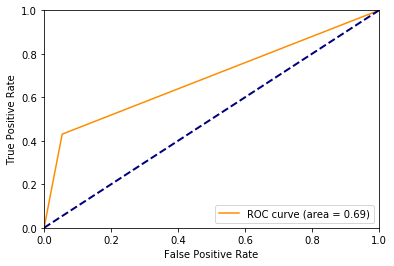

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
#Plot of a ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [33]:
roc_auc_score(y_test, y_pred)

0.6883575883575883

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [34]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [35]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)


for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_test,y_pred)
    accuracy.append(acc)

In [36]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7912000000000001
Standard deviation:  0.010552724766618345
